# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [29]:
import pandas as pd
import numpy as np
Iris=pd.read_csv('Iris_11jan.csv')
Iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
110,111,6.5,3.2,5.1,2.0,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa
141,142,6.9,3.1,5.1,2.3,Iris-virginica
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
142,143,5.8,2.7,5.1,1.9,Iris-virginica
9,10,4.9,3.1,1.5,0.1,Iris-setosa
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-virginica
113,114,5.7,2.5,5.0,2.0,Iris-virginica
49,50,5.0,3.3,1.4,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [4]:
Iris.isnull().sum() #no missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Fill missing values with median of that particular column

In [5]:
Iris.fillna(Iris.mad()) # as no missing values found so no need to replace

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [104]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
Iris['Species']= label_encoder.fit_transform(Iris['Species'])
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [106]:
Iris1=Iris.drop('Id',axis = 1)
Iris1.corr()  # no values in range -0.1 to 0.1 with target variable.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [15]:
Iris1.var() #no values observed less than 0.1

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
Species          0.671141
dtype: float64

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

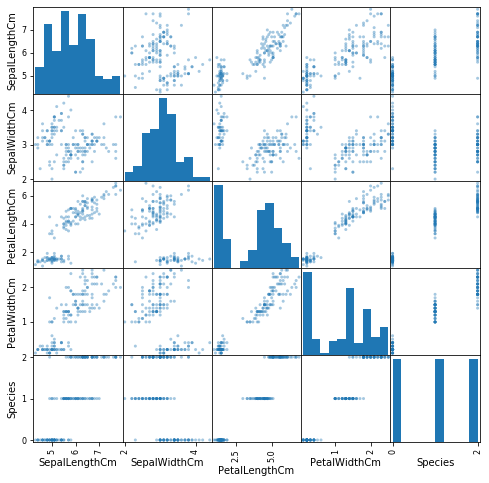

In [264]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(Iris1, alpha=0.4,figsize=(8,8))
plt.show()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
y=Iris1['Species']
X = Iris1.drop('Species',axis=1)
sc=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [266]:
from matplotlib import pyplot as plt
y=Iris1['Species']
X = Iris1.drop('Species',axis=1)
sc=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)
knn=KNeighborsClassifier(n_neighbors=3)
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy for k=3")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy for k=3")
print(knn.score(scaledX_train,y_train))

What is the Testing Accuracy for k=3
0.9
What is the Training Accuracy for k=3
0.9583333333333334


In [267]:
knn=KNeighborsClassifier(n_neighbors=5)
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy for k=5")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy for k=5")
print(knn.score(scaledX_train,y_train))

What is the Testing Accuracy for k=5
0.9
What is the Training Accuracy for k=5
0.9666666666666667


In [268]:
knn=KNeighborsClassifier(n_neighbors=9)
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy for k=9")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy for k=9")
print(knn.score(scaledX_train,y_train))

What is the Testing Accuracy for k=9
0.9333333333333333
What is the Training Accuracy for k=9
0.975


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [298]:
from matplotlib import pyplot as plt
average_test_score = []
average_train_score = []
neighbors = range(1,20,2)
for i in neighbors:
    train = []
    test = []
    knn = KNeighborsClassifier(n_neighbors=i)
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    average_test_score.append(np.mean(test))
    average_train_score.append(np.mean(train))
    print ('test _score',average_test_score)
    print ('train score',average_train_score)

test _score [0.948333333333333]
train score [1.0]
test _score [0.948333333333333, 0.9433333333333331]
train score [1.0, 0.9583333333333333]
test _score [0.948333333333333, 0.9433333333333331, 0.9533333333333334]
train score [1.0, 0.9583333333333333, 0.9608333333333332]
test _score [0.948333333333333, 0.9433333333333331, 0.9533333333333334, 0.9616666666666667]
train score [1.0, 0.9583333333333333, 0.9608333333333332, 0.9679166666666665]
test _score [0.948333333333333, 0.9433333333333331, 0.9533333333333334, 0.9616666666666667, 0.9583333333333334]
train score [1.0, 0.9583333333333333, 0.9608333333333332, 0.9679166666666665, 0.9641666666666666]
test _score [0.948333333333333, 0.9433333333333331, 0.9533333333333334, 0.9616666666666667, 0.9583333333333334, 0.9616666666666666]
train score [1.0, 0.9583333333333333, 0.9608333333333332, 0.9679166666666665, 0.9641666666666666, 0.9616666666666666]
test _score [0.948333333333333, 0.9433333333333331, 0.9533333333333334, 0.9616666666666667, 0.958333

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

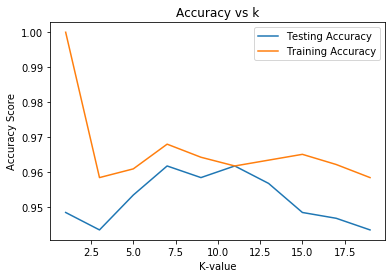

In [299]:
plt.title('Accuracy vs k')
plt.plot(neighbors, average_test_score, label = 'Testing Accuracy')
plt.plot(neighbors, average_train_score, label = 'Training Accuracy')
plt.legend()
plt.xlabel('K-value')
plt.ylabel('Accuracy Score')
plt.show()

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [189]:
bc_df= pd.read_csv('bc2.csv')

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [190]:
bc_df.dtypes # type of each column is int expect 'Bare Nuclei' dtype is object so need to check the data

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [191]:
bc_df.count() # no. of records

ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [192]:
bc_df.describe() # 'Bare Nuclei' coloumn is missing

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [193]:
bc_df.isnull().sum() 

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [194]:
bc_df['Bare Nuclei'].isin(['?']).sum() # total 16 unknown values are present in dataset

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [202]:
bc_df.describe(include='all')  

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [208]:
bc_df['Bare Nuclei'].replace('?','1',inplace=True) # form describe function 'top value'=1, so replace it with 1

In [211]:
bc_df['Bare Nuclei'].isin(['?']).sum() # all unknown values are replace by 1

0

### Question 5
#### Find the distribution of target variable (Class) 

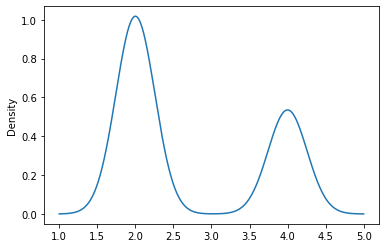

In [213]:
bc_df['Class'].plot(kind='kde')

#### Plot the distribution of target variable using histogram

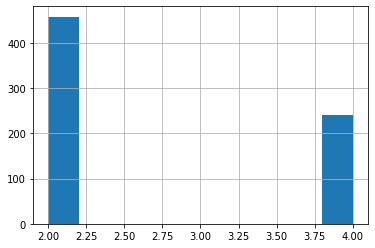

In [214]:
bc_df['Class'].hist()

#### Convert the datatype of Bare Nuclei to `int`

In [224]:
bc_df['Bare Nuclei'].astype(int).inplace=True

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

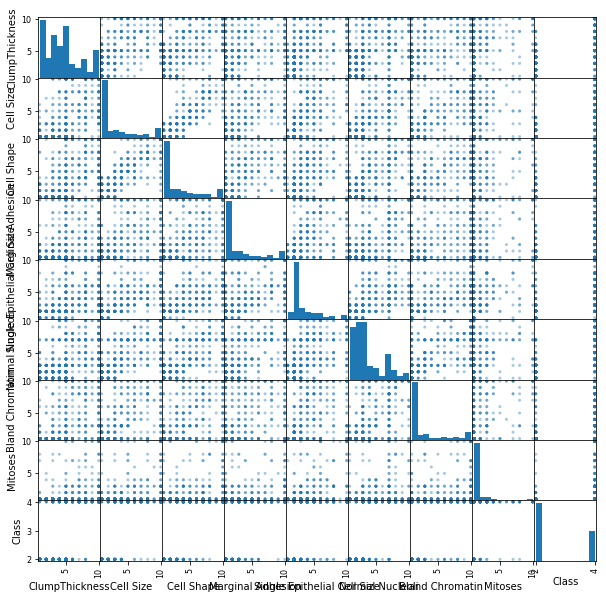

In [227]:
bc_df1=bc_df.drop('ID',axis = 1)
scatter_matrix(bc_df1, alpha=0.4,figsize=(10,10))
plt.show()

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [322]:
y = bc_df1['Class']
X = bc_df1.drop('Class',axis=1)

#### Divide the Training and Test sets in 70:30 

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [367]:
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [368]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy for k=3")
print(accuracy_score(knn.predict(scaledX_test),y_test))
print("What is the Training Accuracy for k=3")
print(accuracy_score(knn.predict(scaledX_train),y_train))

What is the Testing Accuracy for k=3
0.9666666666666667
What is the Training Accuracy for k=3
0.9693251533742331


In [369]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy for k=5")
print(accuracy_score(knn.predict(scaledX_test),y_test))
print("What is the Training Accuracy for k=5")
print(accuracy_score(knn.predict(scaledX_train),y_train))

What is the Testing Accuracy for k=5
0.9809523809523809
What is the Training Accuracy for k=5
0.967280163599182


In [370]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy for k=9")
print(accuracy_score(knn.predict(scaledX_test),y_test))
print("What is the Training Accuracy for k=9")
print(accuracy_score(knn.predict(scaledX_train),y_train))

What is the Testing Accuracy for k=9
0.9666666666666667
What is the Training Accuracy for k=9
0.967280163599182


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

In [363]:
y = bc_df1['Class']
X = bc_df1.drop('Class',axis=1)
from matplotlib import pyplot as plt
avg_test_score = []
avg_train_score = []
neighbors = range(1,20,2)
for k in neighbors:
    train = []
    test = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    avg_test_score.append(np.mean(test))
    avg_train_score.append(np.mean(train))
    print ('test _score',average_test_score)
    print ('train score',average_train_score)

test _score [0.948333333333333, 0.9433333333333331, 0.9533333333333334, 0.9616666666666667, 0.9583333333333334, 0.9616666666666666, 0.9566666666666667, 0.9483333333333333, 0.9466666666666667, 0.9433333333333334, 0.9532142857142855, 0.9617857142857144, 0.9646428571428572, 0.9650000000000001, 0.9650000000000001, 0.9642857142857144, 0.9649999999999999, 0.9635714285714286, 0.9632142857142856, 0.9635714285714286]
train score [1.0, 0.9583333333333333, 0.9608333333333332, 0.9679166666666665, 0.9641666666666666, 0.9616666666666666, 0.9633333333333332, 0.9649999999999996, 0.9620833333333332, 0.9583333333333333, 1.0, 0.9790697674418603, 0.9720035778175313, 0.9708407871198569, 0.9691413237924866, 0.9689624329159212, 0.9693202146690518, 0.9686046511627909, 0.9677996422182469, 0.9682468694096602]
test _score [0.948333333333333, 0.9433333333333331, 0.9533333333333334, 0.9616666666666667, 0.9583333333333334, 0.9616666666666666, 0.9566666666666667, 0.9483333333333333, 0.9466666666666667, 0.94333333333

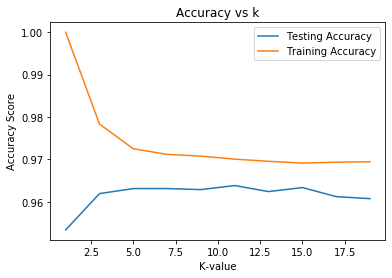

In [371]:
plt.title('Accuracy vs k')
plt.plot(neighbors, avg_test_score, label = 'Testing Accuracy')
plt.plot(neighbors, avg_train_score, label = 'Training Accuracy')
plt.legend()
plt.xlabel('K-value')
plt.ylabel('Accuracy Score')
plt.show()